In [ ]:
from PIL import Image, ImageOps

In [ ]:
import os
import cv2
import numpy as np
from google.colab import drive
drive.mount('/content/drive/')

ModuleNotFoundError: ignored

In [ ]:
# Define paths
base_dir = 'drive/MyDrive/CE784-Assignments/'
prototxt_path = os.path.join(base_dir + 'model_data/deploy.prototxt')
caffemodel_path = os.path.join(base_dir + 'model_data/weights.caffemodel')

# Read the model
model = cv2.dnn.readNetFromCaffe(prototxt_path, caffemodel_path)

In [ ]:
classes = ['Centerstack','Forward','Left_wing_mirror','Rearview_mirror','Right_wing_mirror']

In [ ]:
if not os.path.exists(base_dir+'processed_dataset'):
	print("New directory created")
	os.makedirs(base_dir+'processed_dataset')


New directory created


In [ ]:
for c in classes:
    if not os.path.exists(base_dir+'processed_dataset/'+c):
        print("New directory created")
        os.makedirs(base_dir+'processed_dataset/'+c)
    for file in os.listdir(base_dir + 'gaze_dataset/train/'+c):
        file_name, file_extension = os.path.splitext(file)
        if (file_extension in ['.png','.jpg']):
            print("Image path: {}".format(base_dir + 'gaze_dataset/train/'+c+'/' + file))
        image = cv2.imread(base_dir + 'gaze_dataset/train/'+c+'/' + file)
        h, w = image.shape[:2]
        blob = cv2.dnn.blobFromImage(cv2.resize(image, (300, 300)), 1.0, (300, 300), (104.0, 177.0, 123.0))
        model.setInput(blob)
        detections = model.forward()
        # print(detections[0, 0, 0, 2])
        # for i in range(0, detections.shape[2]):
        box = detections[0, 0, 0, 3:7] * np.array([w, h, w, h])
        (startX, startY, endX, endY) = box.astype("int")
        confidence = detections[0, 0, 0, 2]
        if (confidence > 0.5):
            frame = image[startY:endY, startX:endX]
            cv2.imwrite(base_dir+'processed_dataset/'+c+'/'+ file, frame)
        if (confidence < 0.9):
            print("DANGER!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!")

New directory created
Image path: drive/MyDrive/CE784-Assignments/gaze_dataset/train/Centerstack/Centerstack_245.jpg
Image path: drive/MyDrive/CE784-Assignments/gaze_dataset/train/Centerstack/Centerstack_251.jpg
Image path: drive/MyDrive/CE784-Assignments/gaze_dataset/train/Centerstack/Centerstack_133.jpg
Image path: drive/MyDrive/CE784-Assignments/gaze_dataset/train/Centerstack/Centerstack_291.jpg
Image path: drive/MyDrive/CE784-Assignments/gaze_dataset/train/Centerstack/Centerstack_244.jpg
Image path: drive/MyDrive/CE784-Assignments/gaze_dataset/train/Centerstack/Centerstack_456.jpg
Image path: drive/MyDrive/CE784-Assignments/gaze_dataset/train/Centerstack/Centerstack_481.jpg
Image path: drive/MyDrive/CE784-Assignments/gaze_dataset/train/Centerstack/Centerstack_293.jpg
DANGER!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
Image path: drive/MyDrive/CE784-Assignments/gaze_dataset/train/Centerstack/Centerstack_457.jpg
Image path: drive/MyDrive/CE784-Assignments/gaze_dataset/train/Centerstack/Centerstac

In [ ]:

if not os.path.exists(base_dir+'test_dataset/'):
    print("New directory created")
    os.makedirs(base_dir+'test_dataset/')
for file in os.listdir(base_dir + 'gaze_dataset/test/'):
    file_name, file_extension = os.path.splitext(file)
    if (file_extension in ['.png','.jpg']):
        print("Image path: {}".format(base_dir + 'gaze_dataset/test/' + file))
    image = cv2.imread(base_dir + 'gaze_dataset/test/' + file)
    h, w = image.shape[:2]
    blob = cv2.dnn.blobFromImage(cv2.resize(image, (300, 300)), 1.0, (300, 300), (104.0, 177.0, 123.0))
    model.setInput(blob)
    detections = model.forward()
    # print(detections[0, 0, 0, 2])
    # for i in range(0, detections.shape[2]):
    box = detections[0, 0, 0, 3:7] * np.array([w, h, w, h])
    (startX, startY, endX, endY) = box.astype("int")
    confidence = detections[0, 0, 0, 2]
    if (confidence > 0.5):
        frame = image[startY:endY, startX:endX]
        cv2.imwrite(base_dir+'test_dataset/'+ file, frame)
    if (confidence < 0.9):
        print("DANGER!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!")

New directory created
Image path: drive/MyDrive/CE784-Assignments/gaze_dataset/test/228.jpg
DANGER!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
Image path: drive/MyDrive/CE784-Assignments/gaze_dataset/test/374.jpg
Image path: drive/MyDrive/CE784-Assignments/gaze_dataset/test/412.jpg
Image path: drive/MyDrive/CE784-Assignments/gaze_dataset/test/360.jpg
Image path: drive/MyDrive/CE784-Assignments/gaze_dataset/test/162.jpg
Image path: drive/MyDrive/CE784-Assignments/gaze_dataset/test/406.jpg
Image path: drive/MyDrive/CE784-Assignments/gaze_dataset/test/176.jpg
Image path: drive/MyDrive/CE784-Assignments/gaze_dataset/test/189.jpg
Image path: drive/MyDrive/CE784-Assignments/gaze_dataset/test/214.jpg
DANGER!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
Image path: drive/MyDrive/CE784-Assignments/gaze_dataset/test/348.jpg
Image path: drive/MyDrive/CE784-Assignments/gaze_dataset/test/88.jpg
Image path: drive/MyDrive/CE784-Assignments/gaze_dataset/test/77.jpg
Image path: drive/MyDrive/CE784-Assignments/gaze_dataset/test/63

In [ ]:
import os
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf
import tensorflow.keras.layers as tfl

from tensorflow.keras.preprocessing import image_dataset_from_directory

In [ ]:
data_dir = 'drive/MyDrive/CE784-Assignments/processed_dataset/'
os.listdir(data_dir)

['Centerstack',
 'Forward',
 'Left_wing_mirror',
 'Rearview_mirror',
 'Right_wing_mirror']

In [ ]:
BATCH_SIZE = 32
IMG_SIZE = (160, 160)
directory = data_dir
train_dataset = image_dataset_from_directory(directory,
                                             label_mode = "int",
                                             shuffle=True,
                                             batch_size=BATCH_SIZE,
                                             image_size=IMG_SIZE,
                                             validation_split=0.2,
                                             subset='training',
                                             seed=42)
validation_dataset = image_dataset_from_directory(directory,
                                             label_mode = "int",
                                             shuffle=True,
                                             batch_size=BATCH_SIZE,
                                             image_size=IMG_SIZE,
                                             validation_split=0.2,
                                             subset='validation',
                                             seed=42)

Found 2499 files belonging to 5 classes.
Using 2000 files for training.
Found 2499 files belonging to 5 classes.
Using 499 files for validation.


In [ ]:
image_batch, label_batch = next(iter(train_dataset))
label_batch

<tf.Tensor: shape=(32,), dtype=int32, numpy=
array([0, 4, 4, 3, 1, 1, 4, 2, 3, 0, 2, 2, 2, 3, 2, 2, 3, 1, 0, 3, 4, 1,
       2, 4, 2, 3, 1, 0, 2, 2, 1, 0], dtype=int32)>

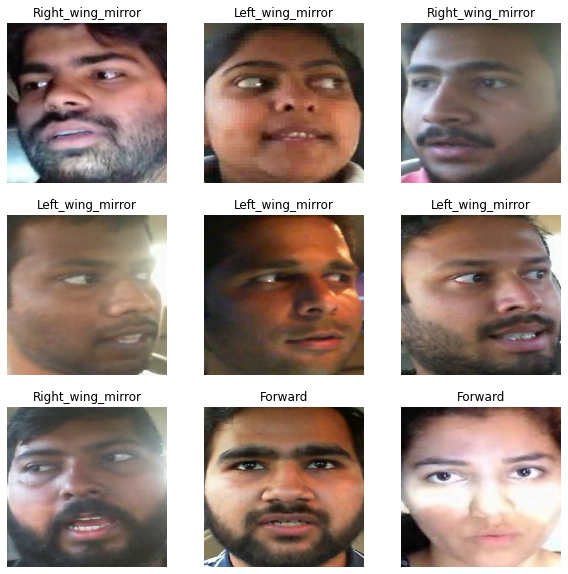

In [ ]:
class_names = train_dataset.class_names
CLASS_NAME = train_dataset.class_names
plt.figure(figsize=(10, 10))
for images, labels in train_dataset.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [ ]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_dataset = train_dataset.prefetch(buffer_size=AUTOTUNE)

In [ ]:
def alpaca_model2(image_shape=IMG_SIZE):
    
    
    input_shape = image_shape + (3,)
    
    base_model = tf.keras.applications.resnet50.ResNet50(input_shape=input_shape,
                                                   include_top=False, 
                                                   weights='imagenet')
    
    base_model.trainable = False
    
    inputs = tf.keras.Input(shape=input_shape) 
    
    x = tf.keras.applications.resnet50.preprocess_input(inputs) 
    
    x = base_model(x, training=False) 
    
    x = tfl.GlobalAveragePooling2D()(x) 
    prediction_layer = tfl.Dense(5, activation='softmax')
    outputs = prediction_layer(x) 
    model = tf.keras.Model(inputs, outputs)
    
    return model

In [ ]:
model3 = alpaca_model2(IMG_SIZE)

In [ ]:
base_learning_rate = 0.015
model3.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

In [ ]:
initial_epochs = 30
history = model3.fit(train_dataset, validation_data=train_dataset, epochs=initial_epochs)

Epoch 1/30
63/63 [==============================] - 22s 285ms/step - loss: 3.2862 - accuracy: 0.4000 - val_loss: 1.3354 - val_accuracy: 0.5950
Epoch 2/30
63/63 [==============================] - 17s 261ms/step - loss: 1.3814 - accuracy: 0.5920 - val_loss: 0.7640 - val_accuracy: 0.7280
Epoch 3/30
63/63 [==============================] - 17s 260ms/step - loss: 0.8548 - accuracy: 0.7175 - val_loss: 0.6835 - val_accuracy: 0.7565
Epoch 4/30
63/63 [==============================] - 17s 260ms/step - loss: 0.7619 - accuracy: 0.7360 - val_loss: 0.3871 - val_accuracy: 0.8655
Epoch 5/30
63/63 [==============================] - 17s 259ms/step - loss: 0.8421 - accuracy: 0.7395 - val_loss: 0.5440 - val_accuracy: 0.8135
Epoch 6/30
63/63 [==============================] - 17s 259ms/step - loss: 0.5289 - accuracy: 0.8195 - val_loss: 0.5015 - val_accuracy: 0.8155
Epoch 7/30
63/63 [==============================] - 17s 260ms/step - loss: 0.4320 - accuracy: 0.8555 - val_loss: 0.3623 - val_accuracy: 0.8675

Text(0.5, 1.0, 'Training and Validation Accuracy')

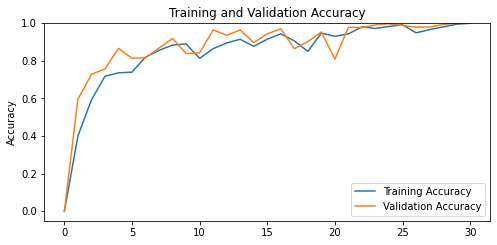

In [ ]:
acc = [0.] + history.history['accuracy']
val_acc = [0.] + history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

In [ ]:
data_dir = 'drive/MyDrive/CE784-Assignments/test/'

In [ ]:
test = np.array([tf.image.resize(np.array(Image.open(data_dir+str(i+1)+".jpg")),[160,160]) for i in range(len(os.listdir(data_dir)))])

In [ ]:
test.shape

(509, 160, 160, 3)

In [ ]:
pred = model3.predict(test)


In [ ]:
pred.shape

(509, 5)

(-0.5, 159.5, 159.5, -0.5)

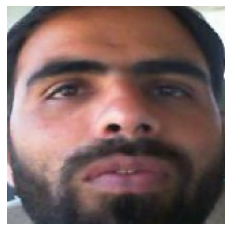

In [ ]:
plt.imshow(test[10].astype("uint8"))
# plt.title(class_names[i])
plt.axis("off")

In [ ]:
y_classes = pred.argmax(axis=-1)
y_classes

array([1, 1, 0, 0, 4, 1, 4, 0, 0, 2, 1, 2, 2, 3, 0, 2, 3, 3, 3, 2, 0, 3,
       0, 3, 1, 0, 4, 0, 4, 2, 1, 3, 1, 4, 0, 1, 4, 4, 1, 4, 4, 1, 4, 1,
       2, 4, 1, 2, 0, 1, 0, 4, 3, 0, 4, 4, 0, 4, 2, 0, 4, 1, 0, 2, 0, 2,
       4, 2, 0, 0, 0, 0, 1, 1, 0, 2, 0, 2, 3, 4, 0, 0, 2, 2, 2, 2, 3, 1,
       1, 4, 2, 4, 2, 1, 4, 4, 2, 1, 2, 0, 2, 0, 0, 4, 2, 4, 3, 2, 3, 3,
       3, 4, 2, 4, 2, 4, 0, 4, 3, 4, 4, 3, 1, 4, 3, 2, 2, 2, 0, 4, 1, 0,
       1, 0, 0, 2, 0, 2, 1, 4, 0, 0, 2, 0, 4, 2, 0, 1, 3, 2, 4, 2, 0, 4,
       3, 4, 4, 0, 2, 1, 4, 1, 0, 2, 0, 0, 1, 4, 2, 0, 2, 3, 3, 2, 4, 0,
       0, 4, 3, 0, 2, 2, 4, 2, 2, 0, 2, 0, 3, 4, 1, 4, 0, 4, 1, 2, 1, 0,
       2, 1, 2, 2, 4, 0, 3, 4, 1, 0, 2, 1, 1, 1, 4, 2, 2, 0, 1, 0, 4, 0,
       0, 0, 3, 2, 1, 4, 0, 2, 4, 1, 3, 0, 4, 2, 2, 2, 2, 0, 4, 1, 2, 2,
       3, 3, 2, 0, 4, 4, 0, 3, 3, 3, 2, 0, 4, 4, 2, 2, 2, 2, 1, 0, 0, 2,
       4, 0, 0, 4, 4, 1, 0, 1, 1, 4, 1, 4, 0, 4, 0, 4, 2, 0, 0, 4, 0, 4,
       3, 3, 4, 2, 2, 3, 4, 3, 4, 2, 0, 0, 3, 2, 4,

In [ ]:
# image_batch, label_batch = next(iter(train_dataset))
CLASS_NAME


['Centerstack',
 'Forward',
 'Left_wing_mirror',
 'Rearview_mirror',
 'Right_wing_mirror']

In [ ]:
labels = []
for idx,i in enumerate(y_classes):
    labels.append([str(idx+1)+".jpg",CLASS_NAME[i]])
labels

[['1.jpg', 'Forward'],
 ['2.jpg', 'Forward'],
 ['3.jpg', 'Centerstack'],
 ['4.jpg', 'Centerstack'],
 ['5.jpg', 'Right_wing_mirror'],
 ['6.jpg', 'Forward'],
 ['7.jpg', 'Right_wing_mirror'],
 ['8.jpg', 'Centerstack'],
 ['9.jpg', 'Centerstack'],
 ['10.jpg', 'Left_wing_mirror'],
 ['11.jpg', 'Forward'],
 ['12.jpg', 'Left_wing_mirror'],
 ['13.jpg', 'Left_wing_mirror'],
 ['14.jpg', 'Rearview_mirror'],
 ['15.jpg', 'Centerstack'],
 ['16.jpg', 'Left_wing_mirror'],
 ['17.jpg', 'Rearview_mirror'],
 ['18.jpg', 'Rearview_mirror'],
 ['19.jpg', 'Rearview_mirror'],
 ['20.jpg', 'Left_wing_mirror'],
 ['21.jpg', 'Centerstack'],
 ['22.jpg', 'Rearview_mirror'],
 ['23.jpg', 'Centerstack'],
 ['24.jpg', 'Rearview_mirror'],
 ['25.jpg', 'Forward'],
 ['26.jpg', 'Centerstack'],
 ['27.jpg', 'Right_wing_mirror'],
 ['28.jpg', 'Centerstack'],
 ['29.jpg', 'Right_wing_mirror'],
 ['30.jpg', 'Left_wing_mirror'],
 ['31.jpg', 'Forward'],
 ['32.jpg', 'Rearview_mirror'],
 ['33.jpg', 'Forward'],
 ['34.jpg', 'Right_wing_mirror'

In [ ]:
import pandas as pd

In [ ]:
labels = np.array(labels).T
print(labels.shape)
path = 'drive/MyDrive/CE784-Assignments/pred.csv'
df = pd.DataFrame({
    'filename':labels[0],
    'class':labels[1]
})
df.to_csv(path,index=False)

(2, 509)
